<a href="https://colab.research.google.com/github/JyotiChiluka/EDA-IPL-T20-CRICKET-ANALYSIS/blob/main/Self_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

The Indian Premier League (IPL) is a domestic, annual Twenty20 cricket tournament in India, organized by the IPL Governing Council, under the aegis of the Board of Control for Cricket in India (BCCI). It is the most watched Twenty20 tournament and the second-best paying sporting league globally. IPL was established in 2008 and currently consists of eight teams in eight cities across India.

#loading libraries
Let us begin our analysis by loading the Python Modules/Packages/Libraries.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading input dataset
In order to read the input data, let us first define the directory/path in which the input file is present. This is to make sure that the path is stored in a string first before using the same (concatenated) with the file name to read the input csv using pd.read_csv() function

In [ ]:
path = '/content/drive/MyDrive/Capstone Projects/IPL T20 Cricket Analysis/IPL Data'
deliveries_df = pd.read_csv(path+'/deliveries.csv')
matches_df = pd.read_csv(path+'/matches.csv')
most_runs_average_strikerate_df = pd.read_csv(path+'/most_runs_average_strikerate.csv')
Players_df = pd.read_excel(path+'/Players.xlsx')
teams_df = pd.read_csv(path+'/teams.csv')
teamwise_home_and_away_df = pd.read_csv(path+'/teamwise_home_and_away.csv') 


#Now get the basic information of dataset 
The basic information we can get it by df.info and read the differet types of data variables present in the data set

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#some more insights of data by df.describe

In [ ]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


#So there are 756 rows and 18 columns. 756 rows imply that there were 756 IPL matches held between 2008 - 2019.

In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_df.columns


Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

#Cleaning the data by replacing the NaN values with zeros(which is not useful for anlysis purpose)

In [ ]:
new_matches_df = matches_df.fillna(0)
new_matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0


#Renaming the columns for those which we get connect easily 

In [ ]:
new_matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,0,0,0
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
new_matches_df.rename(columns= {'player_of_match':'man_of_the_match','dl_applied':'dls_applied'},inplace=True	)
new_matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dls_applied,winner,win_by_runs,win_by_wickets,man_of_the_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,0,0,0
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


#Now lets analyse some of the insights in the dataset 

# **1. Print the top ten man of the match players in IPL**

In [ ]:
new_matches_df['man_of_the_match'].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
SW Billings        1
S Sreesanth        1
Shoaib Akhtar      1
JDP Oram           1
LJ Wright          1
Name: man_of_the_match, Length: 227, dtype: int64

Text(0, 0.5, 'player names')

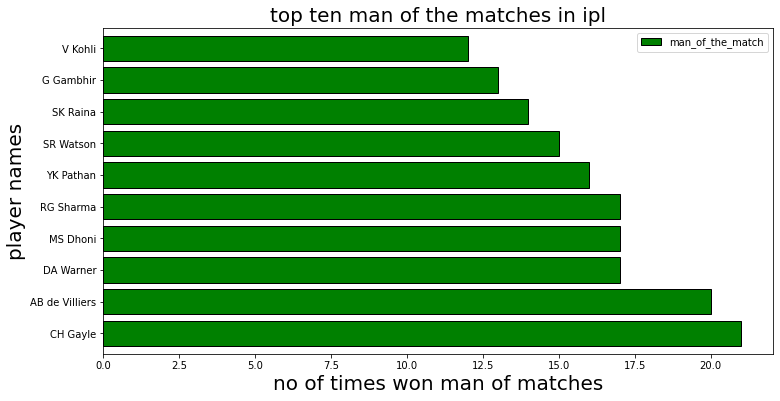

In [ ]:
matches_df_ = new_matches_df['man_of_the_match'].value_counts()
top_ten_player_of_matches_df = matches_df_.head(10)
ab = top_ten_player_of_matches_df.plot.barh(width=0.8,color = 'green',
      linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,)
plt.legend()
ab.set_title('top ten man of the matches in ipl',{'fontsize':20,'fontweight':25})
ab.set_xlabel('no of times won man of matches',{'fontsize':20,'fontweight':25})
ab.set_ylabel('player names',{'fontsize':20,'fontweight':25})


# **2 . Find the top ten batmans of total runs with the corresponding deliveries**

In [ ]:
most_runs_average_strikerate_df.drop_duplicates
most_runs_average_strikerate_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


Text(0, 0.5, 'No of balls and runs ')

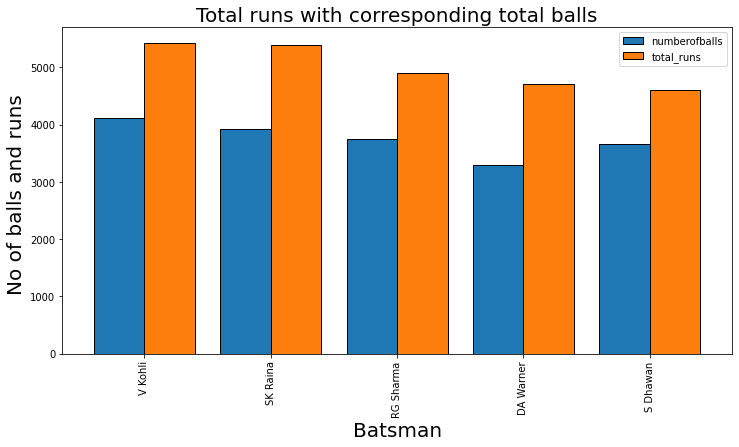

In [ ]:
top_5_players = most_runs_average_strikerate_df[['batsman','numberofballs','total_runs']].set_index('batsman').head()
ab = top_5_players[['numberofballs','total_runs']].sort_values(by ='total_runs',ascending = False).plot.bar(width=0.8,
      linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,)
ab.set_title('Total runs with corresponding total balls',{'fontsize':20,'fontweight':25})
ab.set_xlabel('Batsman',{'fontsize':20,'fontweight':25})
ab.set_ylabel('No of balls and runs ',{'fontsize':20,'fontweight':25})


In [ ]:
Players_df.fillna(0).head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24 00:00:00,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05 00:00:00,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19 00:00:00,Right_Hand,Right-arm offbreak,India
3,A Choudhary,0,Right_hand,Left-arm fast-medium,0
4,A Dananjaya,0,Right_Hand,Right-arm offbreak,0


# **3. Analyse the teamwise (home wins and home matches)**

In [ ]:
teamwise_home_and_away_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


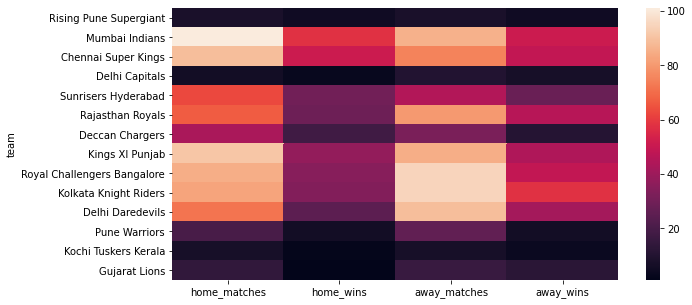

In [ ]:
team_wise = teamwise_home_and_away_df[['team','home_matches','home_wins','away_matches','away_wins']]
ab = team_wise.set_index('team')
plt.figure(figsize=(10,5))
sns.heatmap(ab)

# **4. Find the Top Ten total number of runs scored by Batsman**

In [ ]:
merjed_oj_df =pd.merge(deliveries_df[['batsman','batting_team']],most_runs_average_strikerate_df,how = 'outer', on ='batsman' ) 
merjed_oj_df

,batsman,batting_team,total_runs,out,numberofballs,average,strikerate
0,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
1,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
2,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
3,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
4,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
...,...,...,...,...,...,...,...
179073,S Singh,Kings XI Punjab,16,1,17,16.000000,94.117647
179074,S Singh,Kings XI Punjab,16,1,17,16.000000,94.117647
179075,S Singh,Kings XI Punjab,16,1,17,16.000000,94.117647
179076,S Singh,Kings XI Punjab,16,1,17,16.000000,94.117647


In [ ]:
merjed_oj_df.fillna(0)

,batsman,batting_team,total_runs,out,numberofballs,average,strikerate
0,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
1,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
2,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
3,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
4,DA Warner,Sunrisers Hyderabad,4717,114,3292,41.377193,143.286756
...,...,...,...,...,...,...,...
179073,S Singh,Kings XI Punjab,16,1,17,16.000000,94.117647
179074,S Singh,Kings XI Punjab,16,1,17,16.000000,94.117647
179075,S Singh,Kings XI Punjab,16,1,17,16.000000,94.117647
179076,S Singh,Kings XI Punjab,16,1,17,16.000000,94.117647


In [ ]:
total_runs_df = merjed_oj_df.groupby(['batsman'])['total_runs'].sum().reset_index().sort_values(by = 'total_runs',ascending = False)
top_ten_batsman = total_runs_df.set_index('batsman').head(10)
top_ten_batsman

,total_runs
batsman,
V Kohli,22848886
SK Raina,21780984
RG Sharma,18706032
S Dhawan,17373376
DA Warner,16028366
RV Uthappa,15434640
G Gambhir,14867756
MS Dhoni,14765100
CH Gayle,14167775


Text(0, 0.5, 'Total runs')

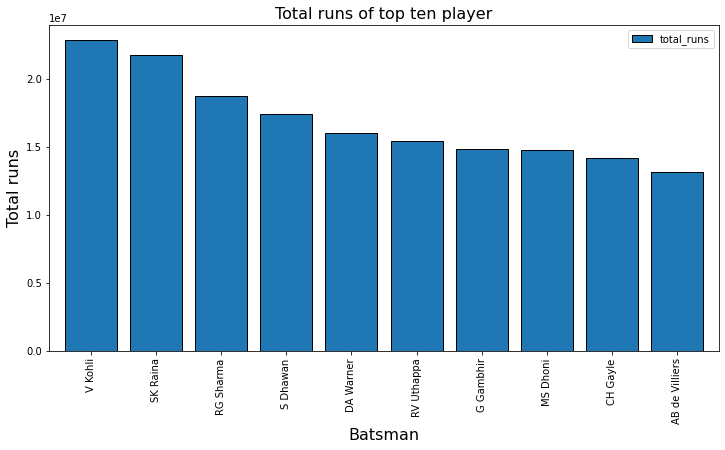

In [ ]:
df = top_ten_batsman.plot.bar(width=0.8,
      linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,)
df.set_title("Total runs of top ten player",{'fontsize':16,'fontweight':30})
df.set_xlabel('Batsman',{'fontsize':16,'fontweight':15})
df.set_ylabel('Total runs',{'fontsize':16,'fontweight':15})

#**5. Find the winning of all teams above 20 runs scored in wankhede stadium in all seasons**

In [ ]:
new_matches_df['venue'].unique().size

41

#so there are 41 venues for ipl twenty 20 matches 

In [ ]:
ab = new_matches_df.loc[0:,['Season','winner','venue','win_by_runs']]
ab

,Season,winner,venue,win_by_runs
0,IPL-2017,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",35
1,IPL-2017,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,0
2,IPL-2017,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,0
3,IPL-2017,Kings XI Punjab,Holkar Cricket Stadium,0
4,IPL-2017,Royal Challengers Bangalore,M Chinnaswamy Stadium,15
...,...,...,...,...
751,IPL-2019,Mumbai Indians,Wankhede Stadium,0
752,IPL-2019,Mumbai Indians,M. A. Chidambaram Stadium,0
753,IPL-2019,Delhi Capitals,ACA-VDCA Stadium,0
754,IPL-2019,Chennai Super Kings,ACA-VDCA Stadium,0


In [ ]:
season = ab[(ab['venue']=='Wankhede Stadium') &(ab['win_by_runs']> 20 )]
season

,Season,winner,venue,win_by_runs
114,IPL-2008,Rajasthan Royals,Wankhede Stadium,105
272,IPL-2011,Mumbai Indians,Wankhede Stadium,23
281,IPL-2011,Mumbai Indians,Wankhede Stadium,32
309,IPL-2012,Pune Warriors,Wankhede Stadium,28
318,IPL-2012,Mumbai Indians,Wankhede Stadium,27
369,IPL-2012,Kolkata Knight Riders,Wankhede Stadium,32
389,IPL-2013,Mumbai Indians,Wankhede Stadium,44
394,IPL-2013,Mumbai Indians,Wankhede Stadium,41
416,IPL-2013,Mumbai Indians,Wankhede Stadium,58
429,IPL-2013,Mumbai Indians,Wankhede Stadium,60


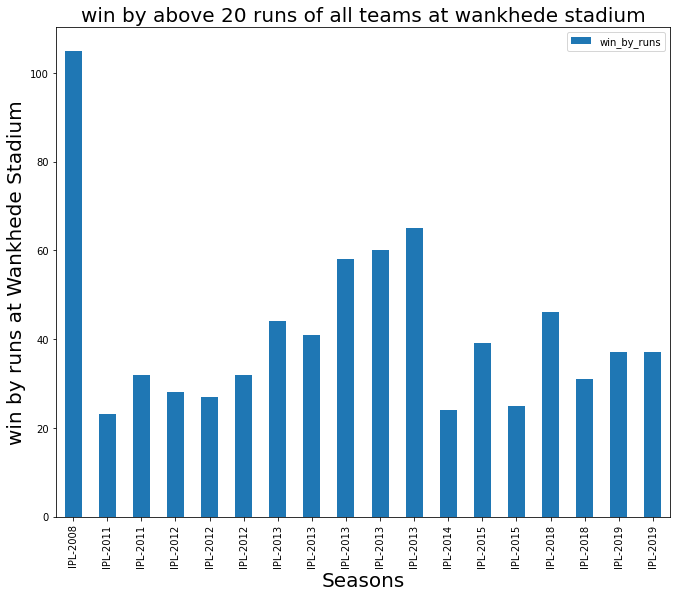

In [ ]:
ax = season.sort_values(['Season']).set_index('Season').sort_values(by='Season',ascending =True).plot.bar()
ax.set_title('win by above 20 runs of all teams at wankhede stadium',{'fontsize':20,'fontweight':25})
ax.set_xlabel('Seasons',{'fontsize':20,'fontweight':25})
ax.set_ylabel('win by runs at Wankhede Stadium',{'fontsize':20,'fontweight':25})
plt.rcParams['figure.figsize'] = (11, 9)